# 단순선형회귀

- 독립변수, 종속변수가 각각 하나인 선형회귀
- 오차제곱합을 최소화하는 RSS

## 경사하강법

## 확률적 경사하강법

# 다항회귀

- 다항회귀는 비선형 회귀가 아닌, 선형 회귀임
- 직선이 아닌 2차, 3차 방벙식과 같은 형태로 표현되는 것

# 편향-분산 트레이드 오프

- 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있음
- 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 "골디락스"지점을 통과하면서 분산을 지속적으로 높이면 전체 오류값이 오히려 증가하면서 예측 성능이 저하됨
- 편향과 분산이 서로 trade-off를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 것

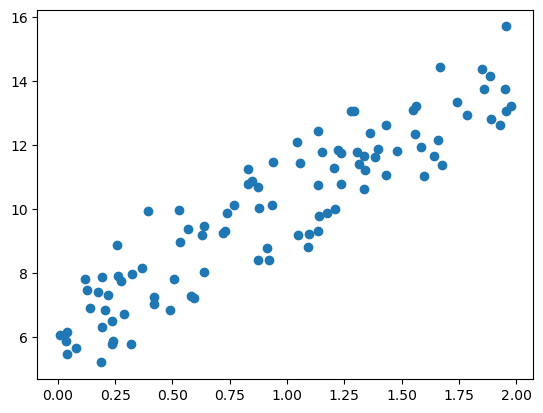

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
# y=4x+6 을 근사(w1=4,w0=6), 임의의 값은 노이즈를 위해 만듦
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)
# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [18]:
# 비용 함수 정의
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

# 경사하강법 함수 생성해서 구현하기
# w1과 w0을 업데이트할 w1_update,w0_update를 반환
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    # 먼저 w1_update,w0_update를 각각 w1,w0의 shape과 동일한 크기를 가진 0값으로 초기화
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred=np.dot(X,w1.T)+w0
    diff=y-y_pred
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors=np.ones((N,1))
    # w1과 w0을  업데이트할 w1_update와 w0_update 계산
    # _update는 예측 오류를 포함함
    w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update,w0_update

In [9]:
# get_weight_updates()을 경사하강법으로 반복적으로 수행하여 w1,w0을 업데이트 하는 함수
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 수행
def gradient_descent_steps(X,y,iters=10000):
    # w1,w0을 모두 0으로 초기화
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates()를 호출해 w1,w0 업데이트 수행
    for ind in range(iters):
        w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
    return w1,w0


In [10]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost
w1,w0=gradient_descent_steps(X,y,iters=1000)
print('w1',round(w1[0,0],4),'w0',round(w0[0,0],4))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost',round(get_cost(y,y_pred),4))

w1 4.0218 w0 6.162
Gradient Descent Total Cost 0.9935


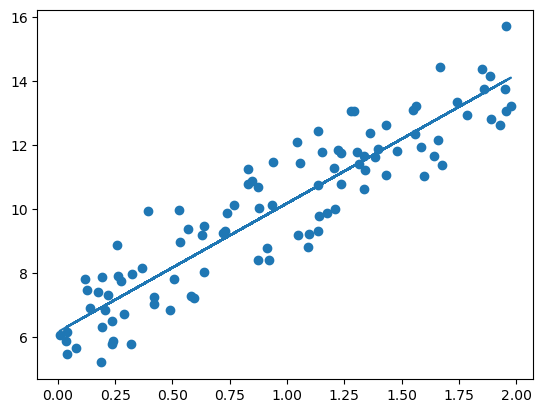

In [11]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [12]:
# 경사하강법은 모든 학습 데이터에 대해 반복적으로 비용함수를 최소화를 하기 위해
# 값을 업데이트 하기 때문에 수행시간이 매우 오래 걸린다는 단점이 있음
# 대부분 실전에서는 확률적 경사 하강법을 이용함
# 일부데이터만을 이용해 w 가 업데이트되는 값을 계산함

def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost=100000
    iter_index=0
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X,y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sampe_X,sample_y로 저장
        stochastic_random_index=np.random.permutation(X.shape[0])
        sample_X=X[stochastic_random_index[0:batch_size]]
        sample_y=y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update,w0_update 계산 후 업데이트
        w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
    return w1,w0

In [14]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1',round(w1[0,0],3))
print('w0',round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost',round(get_cost(y,y_pred),4))

w1 4.028
w0 6.156
Stochastic Gradient Descent Total Cost 0.9937


In [18]:
# 다항회귀

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환된 단항식 생성 [0,1],[2,3]의 2x2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처\n',X)

# degree=2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 피처\n',poly_ftr)

일차 단항식 계수 피처
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [20]:
# 3차 다항 계수를 이용해 3차 다항 회귀 함수식 유도
# 이를 위해 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측
def polynomial_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature \n',X)
y=polynomial_func(X)
print('삼차 다항식 결정값 \n',y)

일차 단항식 계수 feature 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 
 [  5 125]


In [22]:
# 일차 단항식 계수를 3차 다항식 계수로 변환하고 이를 선형 회귀에 적용
# 3차 다항식 변환
from sklearn.linear_model import LinearRegression
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature \n',poly_ftr)
# Linear Regression에서 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 \n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape',model.coef_.shape)

3차 다항식 계수 feature 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape (10,)


In [25]:
# 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다 
# 사이킷런의 Pipeline을 이용해 다항 회귀를 구현하는 것이 더 명료
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
def polynomail_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y
# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model=Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)
model=model.fit(X,y)
print('Polynomial 회귀 계수 \n',np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]



 Degree 1 회귀계수는 [-1.61] 입니다
Degree 1 MSE는 0.40772896250986834 입니다

 Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다
Degree 4 MSE는 0.04320874987231747 입니다

 Degree 15 회귀계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다
Degree 15 MSE는 182815433.47648773 입니다


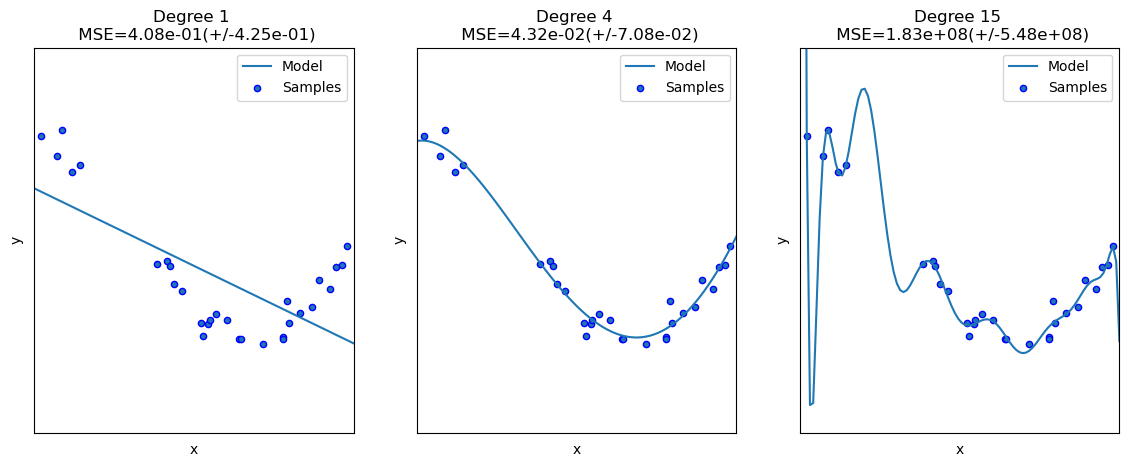

In [28]:
# 차수가 높아질 수록 과적합의 문제가 크게 발생함
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대한 코사인 변환 값을 반환
def true_func(X):
    return np.cos(1.5*np.pi*X)
# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터임
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_func()에서 약간의 노이즈 변동 값을 더한 값
y=true_func(X)+np.random.randn(n_samples)*0.1

# 예측 결과를 비교할 차수를 1,4,15 로 변경하면서 예측 결과 비교
plt.figure(figsize=(14,5))
degrees=[1,4,15]

# 다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교하기
for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    # 개별 degree별로 polynomial 변환
    polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    # 교차 검증으로 다항회귀를 평가
    scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
    coefficients=pipeline.named_steps['linear_regression'].coef_
    print('\n Degree {0} 회귀계수는 {1} 입니다'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다'.format(degrees[i],-1*np.mean(scores)))
    # 0부터 1까지 테스트 데이터 세트를 100개로 나누어 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test=np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='Model')
    plt.scatter(X,y,edgecolor='b',s=20,label='Samples')
    plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc='best')
    plt.title('Degree {} \n MSE={:.2e}(+/-{:.2e})'.format(degrees[i],-scores.mean(),scores.std()))
plt.show()

- 첫번째 Degree=1의 예측곡선은 단순한 직선으로 단순 선형 회귀와 똑같음, 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순함. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하기 못하고 있는 과소적합 모델이 됨

- 가운데 Degree=4의 예측곡선은 실제 데이터 세트와 유사한 모습. 가장 뛰어난 예측 성능 (MSE값을 확인)

- 세번째 Degree=15의 예측곡선은 오류값이 굉장히 큼(MSE로 확인), 데이터 세트이 변동 잡음 값까지 지나치게 반영한 결과, 예측곡선이 학습 데이터 세트만을 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐